In [1]:
from GraphSummarizers.Coarsener.HeteroCoarsener import HeteroCoarsener
from Datasets.NodeClassification.DBLP import DBLP
from Datasets.NodeClassification.AIFB import AIFB
from Datasets.NodeClassification.TestHetero import TestHeteroSmall, TestHeteroBig
import importlib
import torch
from test_data_converter import dgl_to_pyg_input

/home/robin/uu/thesis/convolution-matching/.venvconv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

dataset = DBLP() 
original_graph = dataset.load_graph()

coarsener = HeteroCoarsener(None,original_graph, 0.5)
coarsener.summarize()

start create H
created H 25.098877906799316
stop init costs 7.839738130569458
stop intersection 0.9025225639343262


calculate H_coarsen:   0%|          | 0/4057 [00:00<?, ?it/s]/home/robin/uu/thesis/convolution-matching/GraphSummarizers/Coarsener/HeteroCoarsener.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  h = ((torch.sqrt(torch.tensor(d_u)) * s_u) + (torch.sqrt(torch.tensor(d_v)) * s_v)) / (torch.sqrt(torch.tensor(d_u_v)))
calculate H_coarsen: 100%|██████████| 7723/7723 [00:08<00:00, 871.00it/s]


costs of merges 140.5933539867401
start init merge graph


/home/robin/uu/thesis/convolution-matching/GraphSummarizers/Coarsener/HeteroCoarsener.py:161: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.merge_graphs[ntype].edata["edge_weight"] = torch.tensor(edge_weight_tensor)


created merge graph for type author
created merge graph for type conference
created merge graph for type paper
created merge graph for type term
stop init merge graph 8.054417848587036
stop lowest cost edges 0.012809991836547852
stop merging nodes 0.3164987564086914
update nerge graph 0.1031348705291748
stop merging nodes 0.3096933364868164
update nerge graph 0.05593395233154297
stop merging nodes 2.219947576522827
update nerge graph 0.5492324829101562
stop merging nodes 0.3195185661315918
update nerge graph 0.04988980293273926
stop lowest cost edges 0.0068416595458984375
stop merging nodes 0.2602851390838623
update nerge graph 0.0990602970123291
stop merging nodes 0.2446732521057129
update nerge graph 0.025220870971679688
stop merging nodes 1.1190438270568848
update nerge graph 0.4603760242462158
stop merging nodes 0.26056766510009766
update nerge graph 0.08462142944335938
stop lowest cost edges 0.0058019161224365234
stop merging nodes 0.24148249626159668
update nerge graph 0.08855247

In [15]:
coarsener.pairs_per_level = 100

In [16]:
for i in range(10):
    coarsener.iteration_step()

stop merging nodes 0.2417430877685547
update nerge graph 0.19147205352783203


/home/robin/uu/thesis/convolution-matching/GraphSummarizers/Coarsener/HeteroCoarsener.py:88: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  h = ((torch.sqrt(torch.tensor(d_u)) * s_u) + (torch.sqrt(torch.tensor(d_v)) * s_v)) / (torch.sqrt(torch.tensor(d_u_v)))


stop merging nodes 0.18072032928466797
update nerge graph 0.0033817291259765625
stop merging nodes 1.1004588603973389
update nerge graph 0.30399465560913086
stop merging nodes 0.2934403419494629
update nerge graph 0.18488812446594238
stop merging nodes 1.2603917121887207
update nerge graph 1.552363395690918
stop merging nodes 0.24610543251037598
update nerge graph 0.002184152603149414
stop merging nodes 8.00661039352417
update nerge graph 1.6420807838439941
stop merging nodes 1.0482747554779053
update nerge graph 1.161015510559082
stop merging nodes 0.9500992298126221
update nerge graph 1.2177088260650635
stop merging nodes 0.13509488105773926
update nerge graph 0.0020148754119873047
stop merging nodes 7.966152906417847
update nerge graph 1.6177732944488525
stop merging nodes 0.9976930618286133
update nerge graph 1.1811378002166748
stop merging nodes 0.9768624305725098
update nerge graph 1.1934349536895752
stop merging nodes 0.1506495475769043
update nerge graph 0.0019936561584472656
s

In [ ]:
coarsend_graph = coarsener.get_coarsend_graph()
mapping = coarsener.get_mapping("author")


In [100]:

mappings = coarsener.mappings["author"]

In [84]:
id = 60
for i, map in enumerate(mappings):
    print(i, id)
    id = map[id]
print(id)

0 60
1 tensor(60)
2 tensor(60)
3 tensor(60)
4 tensor(60)
5 tensor(60)
6 tensor(60)
7 tensor(60)
8 tensor(60)
9 tensor(60)
10 tensor(60)
11 tensor(60)
12 tensor(60)
13 tensor(60)
14 tensor(3995)
15 tensor(3985)
16 tensor(3973)
17 tensor(3960)
18 tensor(3950)
19 tensor(3937)
tensor(3927)


In [107]:
max(mappings[12])

tensor(4009)

In [108]:
w = mappings[12]
for i, v in enumerate(w):
    if v.item() == 4008: 
        print(i)
    

In [99]:
mapping[3889]

3688

In [ ]:

k = mappings.copy()[:14]

k.reverse()
id = 4008
for i, map in enumerate(k):
    print(i, id)
    id = map[id]

0 4008
1 tensor(4003)
2 tensor(3990)
3 tensor(3980)
4 tensor(3967)
5 tensor(3961)
6 tensor(3952)
7 tensor(3946)
8 tensor(3933)
9 tensor(3926)
10 tensor(3911)
11 tensor(3901)
12 tensor(3889)


In [ ]:
mappings[10][3990]

tensor(3977)

In [106]:
for k, v in enumerate(mappings[12]):
    #if v == 3927:
        print(k, v)

0 tensor(0)
1 tensor(1)
2 tensor(2)
3 tensor(3)
4 tensor(4)
5 tensor(5)
6 tensor(6)
7 tensor(7)
8 tensor(8)
9 tensor(9)
10 tensor(10)
11 tensor(11)
12 tensor(12)
13 tensor(13)
14 tensor(14)
15 tensor(15)
16 tensor(16)
17 tensor(17)
18 tensor(18)
19 tensor(19)
20 tensor(20)
21 tensor(21)
22 tensor(22)
23 tensor(23)
24 tensor(24)
25 tensor(25)
26 tensor(26)
27 tensor(27)
28 tensor(28)
29 tensor(29)
30 tensor(30)
31 tensor(31)
32 tensor(32)
33 tensor(33)
34 tensor(34)
35 tensor(35)
36 tensor(36)
37 tensor(37)
38 tensor(38)
39 tensor(39)
40 tensor(40)
41 tensor(41)
42 tensor(42)
43 tensor(43)
44 tensor(44)
45 tensor(45)
46 tensor(46)
47 tensor(47)
48 tensor(48)
49 tensor(49)
50 tensor(50)
51 tensor(51)
52 tensor(52)
53 tensor(53)
54 tensor(54)
55 tensor(55)
56 tensor(56)
57 tensor(57)
58 tensor(58)
59 tensor(59)
60 tensor(60)
61 tensor(61)
62 tensor(62)
63 tensor(63)
64 tensor(64)
65 tensor(65)
66 tensor(66)
67 tensor(67)
68 tensor(68)
69 tensor(69)
70 tensor(70)
71 tensor(71)
72 tensor(72

In [102]:
mappings[14]

tensor([   0,    1,    2,  ..., 3995, 3993, 3994])

In [39]:
original_graph.nodes["author"].data['label'][3927]

tensor(0)

In [36]:
coarsend_graph.nodes["author"].data['label'][3927]

tensor(1)

In [5]:
original_data, o_x_dict, o_edge_index_dict, o_node_types, o_edge_types = dgl_to_pyg_input(original_graph)
coarsened_data, c_x_dict, c_edge_index_dict, c_node_types, c_edge_types = dgl_to_pyg_input(coarsend_graph)

In [6]:
import torch
import numpy as np
from torch_geometric.data import HeteroData

# Assuming you already have your hetero_data object
# hetero_data = HeteroData(...)

def create_train_val_test_masks(hetero_data, train_ratio=0.1, val_ratio=0.1, test_ratio=0.8, random_state=42, target_node_type='author'):
    """
    Create training, validation, and testing masks for author nodes.
    
    Args:
        hetero_data: HeteroData object
        train_ratio: Ratio of training data
        val_ratio: Ratio of validation data
        test_ratio: Ratio of testing data
        random_state: Random seed for reproducibility
    
    Returns:
        HeteroData object with train_mask, val_mask, and test_mask added to author nodes
    """
    # Ensure ratios sum to 1
    assert abs(train_ratio + val_ratio + test_ratio - 1.0) < 1e-6, "Ratios must sum to 1"
    
    # Get number of author nodes
    num_authors = hetero_data[target_node_type]["feat"].size(0)
    
    # Create random permutation of node indices
    np.random.seed(random_state)
    indices = np.random.permutation(num_authors)
    
    # Calculate split sizes
    train_size = int(num_authors * train_ratio)
    val_size = int(num_authors * val_ratio)
    
    # Split indices
    train_indices = indices[:train_size]
    val_indices = indices[train_size:train_size + val_size]
    test_indices = indices[train_size + val_size:]
    
    # Create boolean masks
    train_mask = torch.zeros(num_authors, dtype=torch.bool)
    val_mask = torch.zeros(num_authors, dtype=torch.bool)
    test_mask = torch.zeros(num_authors, dtype=torch.bool)
    
    train_mask[train_indices] = True
    val_mask[val_indices] = True
    test_mask[test_indices] = True
    
    # Add masks to hetero_data
    hetero_data[target_node_type].train_mask = train_mask
    hetero_data[target_node_type].val_mask = val_mask
    hetero_data[target_node_type].test_mask = test_mask
    
    # Print split statistics
    print(f"Split statistics:")
    print(f"  Training: {train_mask.sum()} nodes ({train_mask.sum() / num_authors:.2%})")
    print(f"  Validation: {val_mask.sum()} nodes ({val_mask.sum() / num_authors:.2%})")
    print(f"  Testing: {test_mask.sum()} nodes ({test_mask.sum() / num_authors:.2%})")
    
    return hetero_data

# Example usage
original_data =  create_train_val_test_masks(original_data, train_ratio=0.1, val_ratio=0.1, test_ratio=0.8, target_node_type='author')
coarsened_data = create_train_val_test_masks(coarsened_data, train_ratio=0.1, val_ratio=0.1, test_ratio=0.8, target_node_type='author')

# Accessing the masks
# train_nodes = hetero_data['author'].x[hetero_data['author'].train_mask]
# val_nodes = hetero_data['author'].x[hetero_data['author'].val_mask]
# test_nodes = hetero_data['author'].x[hetero_data['author'].test_mask]


Split statistics:
  Training: 405 nodes (9.98%)
  Validation: 405 nodes (9.98%)
  Testing: 3247 nodes (80.03%)
Split statistics:
  Training: 398 nodes (9.99%)
  Validation: 398 nodes (9.99%)
  Testing: 3187 nodes (80.02%)


Epoch 1:
  Original Graph - Loss: 1.4883, Accuracy: 0.5922
  Coarsened Graph - Loss: 1.4683, Accuracy: 0.5064
  Inverted Coarsened - Accuracy: 0.3517

Epoch 11:
  Original Graph - Loss: 0.0048, Accuracy: 0.7844
  Coarsened Graph - Loss: 0.0172, Accuracy: 0.7935
  Inverted Coarsened - Accuracy: 0.4560

Epoch 21:
  Original Graph - Loss: 0.0004, Accuracy: 0.7758
  Coarsened Graph - Loss: 0.0003, Accuracy: 0.7857
  Inverted Coarsened - Accuracy: 0.4511

Epoch 31:
  Original Graph - Loss: 0.0027, Accuracy: 0.7681
  Coarsened Graph - Loss: 0.0032, Accuracy: 0.7741
  Inverted Coarsened - Accuracy: 0.4474

Epoch 41:
  Original Graph - Loss: 0.0003, Accuracy: 0.7669
  Coarsened Graph - Loss: 0.0001, Accuracy: 0.7785
  Inverted Coarsened - Accuracy: 0.4431



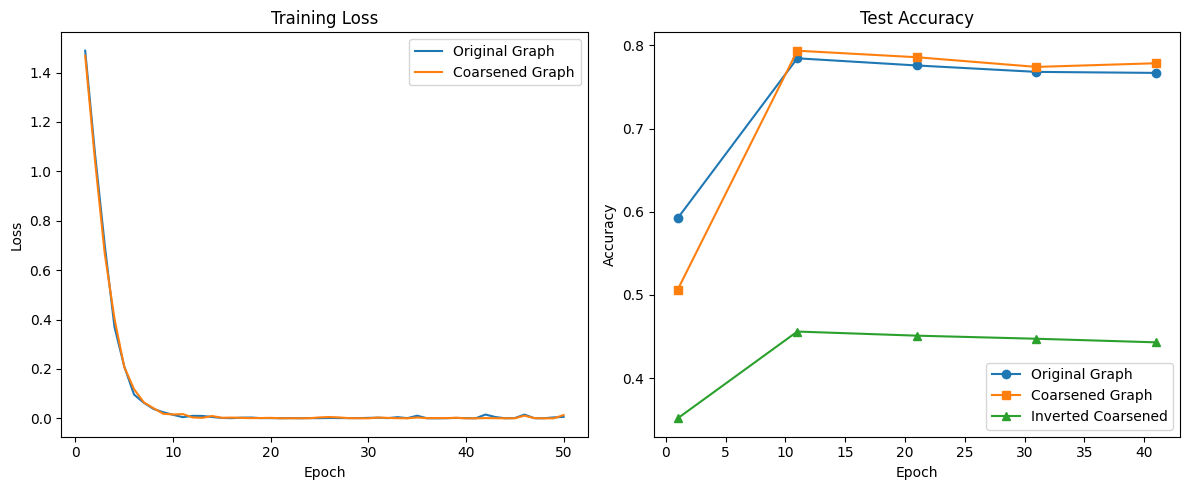

Final Performance Comparison:
Original Graph Accuracy: 0.7669
Coarsened Graph Accuracy: 0.7785
Inverted Coarsened Accuracy: 0.4431


In [7]:
# Import necessary libraries (if not already imported)
import torch
import torch.nn.functional as F
import numpy as np
from Models.GNNs.HGCN import ImprovedHeteroGNN


original_x_dict = o_x_dict
coarsened_x_dict = c_x_dict
o_metadata = (o_node_types, o_edge_types)
c_metadata=(c_node_types, c_edge_types)
#original_x_dict.update({"conference": torch.zeros((original_data["conference"]["num_nodes"], 1))})# = 0  #= 0#
#coarsened_x_dict.update({"conference": torch.zeros((coarsened_data["conference"]["num_nodes"], 1))})# = 0  #= 0#

#num_classes = len(original_data["author"]["label"].unique())

target_node_type = "author"
# Your existing model definition
model_original = ImprovedHeteroGNN(metadata=o_metadata,target_feat=target_node_type, x_dict= original_x_dict ,num_classes= 4,hidden_channels=64, with_non_linear= False)
model_coarsened = ImprovedHeteroGNN(metadata=c_metadata, target_feat=target_node_type,x_dict= coarsened_x_dict,num_classes= 4, hidden_channels=64, with_non_linear= False)

# Optimizers
optimizer_original = torch.optim.Adam(model_original.parameters(), lr=0.01, weight_decay=5e-4)
optimizer_coarsened = torch.optim.Adam(model_coarsened.parameters(), lr=0.01, weight_decay=5e-4)


# Function to apply inversion mapping from coarsened to original
def apply_inversion_mapping(coarsened_pred, inversion_map, original_labels, test_mask):
    """
    Maps predictions from coarsened graph back to original graph nodes
    
    Args:
        coarsened_pred: Predictions on coarsened graph
        inversion_map: Mapping from coarsened nodes to original nodes
        original_labels: Ground truth labels of original graph
        
    Returns:
        mapped_accuracy: Accuracy after applying inversion mapping
    """
    correct_count = 0
    total_count = 0
    
    for orig_node, coarsened_node in inversion_map.items():
        if not test_mask[coarsened_node]:
            continue
        coarse_pred = coarsened_pred[coarsened_node]
        orig_label = original_labels[orig_node]
        #print(coarse_pred, orig_label)

        correct = (coarse_pred == orig_label)
    
                
        if correct:
            correct_count += 1
     #   else:
      #      print(f"Mismatch: Coarsened Node {coarsened_node} predicted {coarse_pred}, Original Node {orig_node} label {orig_label}")
        total_count += 1
    
    return correct_count / total_count if total_count > 0 else 0

# Training function for original graph
def train_original():
    model_original.train()
    optimizer_original.zero_grad()
    
    out = model_original(original_x_dict, original_data.edge_index_dict)
    loss = F.nll_loss(
        out[target_node_type][original_data[target_node_type].train_mask], 
        original_data[target_node_type]["label"][original_data[target_node_type].train_mask]
    )
    loss.backward()
    optimizer_original.step()
    return loss.item()

# Training function for coarsened graph
def train_coarsened():
    model_coarsened.train()
    optimizer_coarsened.zero_grad()
    out = model_coarsened(coarsened_x_dict, coarsened_data.edge_index_dict)
    loss = F.nll_loss(
        out[target_node_type][coarsened_data[target_node_type].train_mask], 
        coarsened_data[target_node_type]["label"][coarsened_data[target_node_type].train_mask]
    )
    loss.backward()
    optimizer_coarsened.step()
    return loss.item()

# Evaluation function for original graph
def test_original():
    model_original.eval()
    with torch.no_grad():
        out = model_original(original_x_dict, original_data.edge_index_dict)
        pred = out[target_node_type].argmax(dim=1)
        
        # Calculate accuracy on test set
        correct = pred[original_data[target_node_type].test_mask] == original_data[target_node_type]["label"][original_data[target_node_type].test_mask]
        acc = int(correct.sum()) / int(original_data[target_node_type].test_mask.sum())
        return acc

# Evaluation function for coarsened graph
def test_coarsened():
    model_coarsened.eval()
    with torch.no_grad():
        out = model_coarsened(coarsened_x_dict, coarsened_data.edge_index_dict)
        pred = out[target_node_type].argmax(dim=1)
        
        # Calculate accuracy on test set
        coarsened_acc = int(
            (pred[coarsened_data[target_node_type].test_mask] == 
             coarsened_data[target_node_type]["label"][coarsened_data[target_node_type].test_mask]).sum()
        ) / int(coarsened_data[target_node_type].test_mask.sum())
        inverted_acc = 0
        
        # Apply inversion mapping to evaluate how coarsened predictions map to original graph
        inverted_acc  = apply_inversion_mapping(
             pred,  
             mapping,
             original_data[target_node_type]["label"], 
             coarsened_data[target_node_type].test_mask
         )
        return coarsened_acc, inverted_acc

# Training for 50 epochs and comparing both models
results = {
    "epoch": [],
    "original_loss": [],
    "coarsened_loss": [],
    "original_acc": [],
    "coarsened_acc": [],
    "inverted_acc": []
}

for epoch in range(50):
    # Train both models
    original_loss = train_original()
    coarsened_loss = train_coarsened()
    
    # Store results
    results["epoch"].append(epoch+1)
    results["original_loss"].append(original_loss)
    results["coarsened_loss"].append(coarsened_loss)
    
    # Evaluate every 10 epochs
    if epoch % 10 == 0:
        original_acc = test_original()
        coarsened_acc, inverted_acc = test_coarsened()
        
        results["original_acc"].append(original_acc)
        results["coarsened_acc"].append(coarsened_acc)
        results["inverted_acc"].append(inverted_acc)
        
        print(f'Epoch {epoch+1}:')
    
    
        print(f'  Original Graph - Loss: {original_loss:.4f}, Accuracy: {original_acc:.4f}')
        print(f'  Coarsened Graph - Loss: {coarsened_loss:.4f}, Accuracy: {coarsened_acc:.4f}')
        print(f'  Inverted Coarsened - Accuracy: {inverted_acc:.4f}')
        print()

# Visualization of results
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(results["epoch"], results["original_loss"], label="Original Graph")
plt.plot(results["epoch"], results["coarsened_loss"], label="Coarsened Graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
x = [results["epoch"][i] for i in range(0, 50, 10)]
plt.plot(x, results["original_acc"], 'o-', label="Original Graph")
plt.plot(x, results["coarsened_acc"], 's-', label="Coarsened Graph")
plt.plot(x, results["inverted_acc"], '^-', label="Inverted Coarsened")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# Final comparison
print("Final Performance Comparison:")
print(f"Original Graph Accuracy: {results['original_acc'][-1]:.4f}")
print(f"Coarsened Graph Accuracy: {results['coarsened_acc'][-1]:.4f}")
print(f"Inverted Coarsened Accuracy: {results['inverted_acc'][-1]:.4f}")

# Calculate speedup from using coarsened graph
# (You would need to time the training for a proper comparison)